---
jupyter: false
---

# 01 | Rhythm and Time | 01 | Intro to Rhythm Trees


In [1]:
import klotho
klotho.set_audio_engine("supersonic")

In [2]:
from klotho import Tree, RhythmTree as RT, plot, play
from fractions import Fraction

In [3]:
from klotho.thetos import JsInstrument as JsInst, CompositionalUnit as UC
from klotho.chronos import TemporalUnitSequence as UTS, TemporalBlock as BT
from klotho.topos import Pattern, PartitionSet as PS
from klotho.tonos import Scale, Contour
import numpy as np

### PREVIEW:

#### Want to make rhythms like this?

In [4]:
# # Chronostasis

# tempus = '10/16'
# beat = '1/16'
# bpm = 140
# n_bars = 4

# S1 = ((3, (1,)*4), (4, (1,)*6), (3, (1,)*4))
# S2 = ((5, (1,)*5),)*2

# inst_pat_1 = Pattern([JsInst.HatClosed(), [JsInst.HatClosed(), [[JsInst.TomHigh(), JsInst.TomMid()], [JsInst.HatOpen(), [JsInst.Ride(decay=0.2), JsInst.HatClosed()]]]]])
# uc1 = UC(tempus=tempus, prolatio=S1, beat=beat, bpm=bpm)
# uts1 = uc1.repeat(n_bars)
# for unit in uts1:
#     unit.set_instrument(unit.leaf_nodes, inst_pat_1)
#     unit.set_pfields(unit.leaf_nodes, vel=lambda: np.random.uniform(0.001, 0.25))

# inst_pat_2 = Pattern([[[JsInst.Kick("kick_punchy", punch=16), JsInst.Kick("kick_pitchy", pitchDecay=0.05, decay=0.9)], JsInst.Snare()], JsInst.Kick()])
# uc2 = UC(tempus=tempus, prolatio=S2, beat=beat, bpm=bpm)
# uts2 = uc2.repeat(n_bars)
# for unit in uts2:
#     unit.set_instrument(unit.leaf_nodes, inst_pat_2)
#     unit.set_pfields(unit.leaf_nodes, vel=lambda: np.random.uniform(0.75, 0.9))

# play(BT([uts1, uts2]))

...or like this?

In [5]:
# # Entertain Me

# tempus = '36/16'
# beat = '1/8'
# bpm = 184
# n_bars = 2

# scale = Scale.phrygian().root('B3')

# S1 = ((20, ((5, (1,)*5),)*4), (15, ((3, (1,)*3),)*5))

# uc_mel = UC(tempus=tempus, prolatio=S1, beat=beat, bpm=bpm, inst=JsInst.Kalimba())
# limbs = uc_mel.at_depth(1)
# uc_mel.set_mfields(limbs[0], idx=0, drct=1, offset=0)
# uc_mel.set_mfields(limbs[1], idx=len(scale), drct=-1, offset=0)
# uc_mel.set_mfields(list(uc_mel.successors(limbs[-1])), offset=lambda c: c.total - c.index)

# for branch in uc_mel.at_depth(2):
#     uc_mel.set_pfields(
#         uc_mel.subtree_leaves(branch),
#         freq=lambda c: scale[c.params['offset'] + c.params['idx'] + c.params['drct'] * c.index].freq
#     )

# uc_ds = UC(tempus=tempus, prolatio=S1, beat=beat, bpm=bpm)
# uc_ds.set_instrument(uc_ds.subtree_leaves(limbs[0]), Pattern([[JsInst.Kick(), JsInst.Snare()], JsInst.HatClosed()]))
# uc_ds.set_instrument(uc_ds.subtree_leaves(limbs[-1]), lambda c: JsInst.HatOpen(vel=0.1) if c.index % 2 == 0 else JsInst.HatClosed())

# uc_bs = UC(tempus=tempus, prolatio=S1, beat=beat, bpm=bpm, inst=JsInst.Bassy(freq=scale[-len(scale)*2].freq, vel=0.2))
# bs_pat = Pattern([0, 0, [1, [3, [4, -3]]]])
# uc_bs.make_rest(limbs[-1])
# seq_bs = uc_bs.repeat(n_bars)
# for unit in seq_bs:
#     unit.set_pfields(unit.leaf_nodes, freq=lambda: scale[next(bs_pat) - len(scale)*2].freq)

# play(BT([uc_mel.repeat(n_bars), uc_ds.repeat(n_bars), seq_bs]))

...or like this?

In [6]:
# # Polyriddim

# S1 = ((1, ((6, (1,)*7), (8, (1,)*11))), (1, ((6, ((3, (1,)*4), 1, (2, (1,)*3))), (8, ((3, (1,)*4), (3, (1,)*4), (5, (1,)*5))))), (1, ((6, (2, (3, (1,)*4), (2, (1,)*4))), (8, ((2, (1,)*3), (2, (1,)*4), (2, (1,)*5), (2, (1,)*5))))), (1, ((6, ((2, (1,)*3), (2, (1,)*3), (2, (1,)*3))), (8, (5, (6, (1,)*11))))))
# S2 = ((7, ((3, (1,)*3), (4, (1,)*4))),)*4

# tempus = '28/16'
# beat = '1/16'
# bpm = 122.5

# inst1_pat = Pattern([
#     [JsInst.Kick(), [
#         [JsInst.Kick("kick_punch", punch=9, click=0.6), JsInst.Snare("snare_body", body=0.8)], JsInst.TomMid()]],
#     [JsInst.Kick("kick_click", click=0.8), [
#         [JsInst.Snare(), JsInst.TomHigh(punch=8, decay=0.9)], JsInst.TomLow()]]
# ])

# n_bars = 2

# uc1 = UC(tempus=tempus, prolatio=S1, beat=beat, bpm=bpm)
# uts1 = uc1.repeat(n_bars)
# for unit in uts1:
#     unit.sparsify(0.33)
#     unit.set_instrument(unit.leaf_nodes, inst1_pat)
#     unit.set_pfields(unit.leaf_nodes, vel=lambda: np.random.uniform(0.25, 0.85))

# uc2 = UC(tempus=tempus, prolatio=S2, beat=beat, bpm=bpm)
# uts2 = uc2.repeat(n_bars)
# for unit in uts2:
#     for branch in unit.at_depth(2):
#         unit.set_instrument(branch, JsInst.HatClosed())
#         unit.set_instrument(unit.successors(branch)[-1], JsInst.HatOpen())
#         unit.set_pfields(unit.subtree_leaves(branch), vel=lambda: np.random.uniform(0.05, 0.25))

# scale = Scale.locrian().root('Eb2')
# scl_pat = Pattern([[0, -1, [0, -3]], [1, [3, 4]]])
# uc3 = UC(tempus=tempus, prolatio=S1, beat=beat, bpm=bpm, inst=JsInst.Bassy())
# uts3 = uc3.repeat(n_bars)
# for unit in uts3:
#     unit.sparsify(0.67)
#     unit.set_pfields(unit.leaf_nodes, freq=lambda: scale[next(scl_pat)].freq, vel=lambda: np.random.uniform(0.1, 0.5))

# play(BT([uts1, uts2, uts3]))

#### Yes? Then keep reading!

#### No? Well... keep reading anyway!

---

## Trees

A **tree** is a graph where any two nodes are connected by exactly one path. Each node can have multiple children but only one parent, except for the **root node**, which has no parent. Nodes with no children are called **leaf nodes**.

Here is a *binary tree* (each node has at most 2 children):

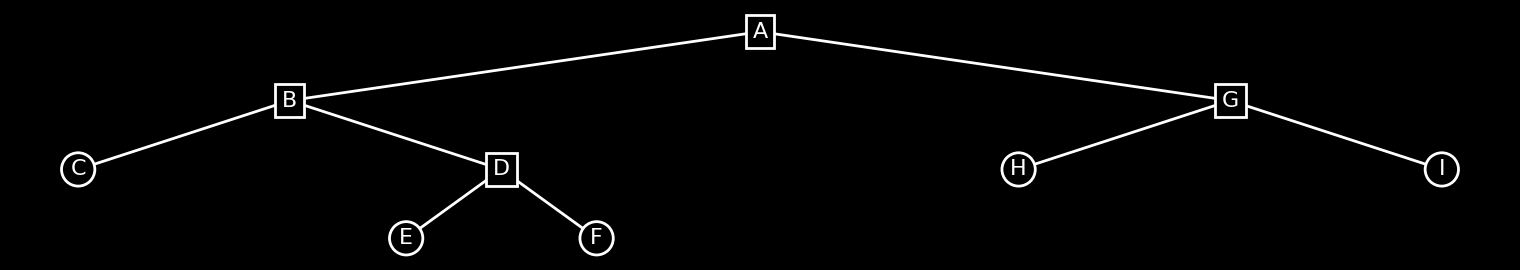

In [7]:
plot(Tree('A', (('B', ('C', ('D', ('E', 'F')))), ('G', ('H', 'I')))), figsize=(15, 2.5))

Leaf nodes are depicted with circles. `A` is the root.

Trees do not have to be binary. A ***k*-ary tree** allows nodes to have up to *k* children:

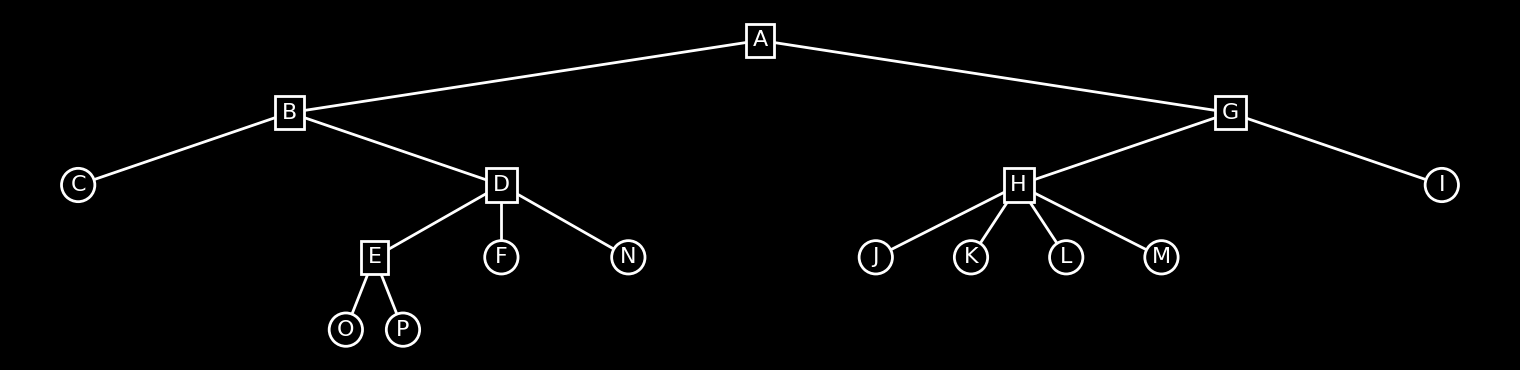

In [8]:
plot(Tree('A', (('B', ('C', ('D', (('E', ('O', 'P')), 'F', 'N')))), ('G', (('H', ('J', 'K', 'L', 'M')), 'I')))), figsize=(15, 3.5))

This is a *4*-tree: node `H` has 4 children, the maximum. Other nodes use fewer. Not every node needs the full *k*.

The **depth** of a tree is the distance from the root to the furthest leaf. The tree above has depth 4: nodes `O` and `P` are 4 levels from root `A`.

---

## Rhythm Trees

A **Rhythm Tree** (**RT**) describes hierarchical rhythmic structure as a *k*-ary tree.

As we saw in the [Principles of Proportion](../1-0-1_principles_of_proportion.ipynb) notebook, the durations in an RT are *relative* **proportions** of a parent container — not absolute values. No matter how we subdivide, the proportions always account for the whole.

With that foundation in place, let's explore what makes Rhythm Trees truly powerful: **nesting**.

### Nesting and Recursion

So far these have all been flat lists. The tree structure becomes interesting when we start nesting subdivisions.

Let's subdivide the first element of `(4 2 1 1)` into three equal parts. So, we'll go from this..

In [9]:
rt = RT(subdivisions=(4, 2, 1, 1))
plot(rt, layout='tree', animate=True, beat='1/4', bpm=120)

...to this...

In [10]:
# plot(Tree(1, ((4, (1, 1, 1)), 2, 1, 1)), figsize=(20, 3))
rt = RT(subdivisions=((4, (1, 1, 1)), 2, 1, 1))
plot(rt, layout='tree', animate=True, beat='1/4', bpm=120)

The first subdivision now has three children. Let's check out the resultant rhythmic ratios:

In [11]:
print('Durations:', *[str(d) for d in rt.durations])
print('Sum:      ', sum(rt.durations))

Durations: 1/6 1/6 1/6 1/4 1/8 1/8
Sum:       1


More ratios (because we have more subdivisions), but they still sum to 1.

Instead of this tree view, it may become clearer to look at the structure like "containers":

In [12]:
plot(rt, layout='containers', animate=True, beat='1/4', bpm=120)

Each level represents a level in the tree and each block represents a node. Children of a node are blocks placed directly below. The thin line at the bottom shows the resultant ratios—i.e., the rhythm.

Compare this representation to the tree representation. Do you see how both are representations of the same thing?

Let's add another level of subdivisions...

In [13]:
rt = RT(subdivisions=((4, (1, 1, (1, (1, 1)))), 2, 1, 1))
plot(rt, layout='tree', figsize=(11, 2.5), animate=True, beat='1/4', bpm=120)

...and the same thing, but represented as containers...

In [14]:
plot(rt, layout='containers', animate=True, beat='1/4', bpm=120)

In [15]:
print('Durations:', *[str(d) for d in rt.durations])
print('Sum:      ', sum(rt.durations))

Durations: 1/6 1/6 1/12 1/12 1/4 1/8 1/8
Sum:       1


Even more subdivisions, still sums to 1.

**Question:** Given a tree, how can we tell how many "notes" we'll have in our rhythm?

**Answer:** Count the number of leaf nodes. Go back and look at the above **RT**s, count the number of leaves and compare to the number of note events in the rhythm. It's always the same.

---

### The `(D S)` Formalism

Let's take a moment to formally define a Rhythm Tree (**RT**).


An **RT** is defined as a pair `(D S)` where:

- `D` is a positive, non-zero integer representing a *duration*.
- `S` is a list of proportional *subdivisions* of `D`.

Each element of `S` is either a non-zero integer or another `(D S)` pair. This means **RT**s can be nested: a subdivision can be subdivided, which can also be subdivided, and so on...

That is to say, **RT**s are a **recursive** structure.

#### Group Notation

How does the last **RT** we made look in this `(D S)` format? Like this: `((1 ((4 (1 1 (1 (1 1)))) 2 1 1)))`

Ok, if you're confused by that, don't worry. This notation *is* a bit difficult to digest at first. So, let's break down how we arrived at this...

We started with some block of time, duration `1`. We then subdivided it into four proportions. That gave us this:

`(1 (4 2 1 1))`

Where `D = 1`, and `S = (4 2 1 1)`. So, `(D S) = (1 (4 2 1 1))`.

We then subdivided the first element of `S`, `4`. Recall, each element of `S` is either a non-zero integer *or* another `(D S)` pair. So, that gave us:

`(1 ((4 (1 1 1)) 2 1 1))`

We then subdivided the last subdivision of the `4` segment by splitting `1` into `(1 (1 1))`, giving us:

`((1 ((4 (1 1 (1 (1 1)))) 2 1 1)))`

This is what's called **group notation**. It comes from the LISP programming language. The name "LISP" is an abbreviation for "list processing". Although, a common joke is that it *really* stands for **L**ost **I**n **S**tupid **P**arenthesis.

There's a certain degree of truth in that joke... it's not exactly the easiest notation to read. This is one of the reasons we conceptualize and visualize **RT**s as tree graphs, or as a stack of "containers". This is actually what the group notation is encoding, it's just not immediately clear if you're not used to it.

When we create an **RT** in Klotho, we can always access its group notation like this:

In [16]:
rt = RT(meas=1, subdivisions=((4, (1, 1, (1, (1, 1)))), 2, 1, 1))
print(rt.group)

Group((1 ((4 (1 1 (1 (1 1)))) 2 1 1)))


We can also access additional information about the **RT** like this:

In [17]:
print(rt.info)

--------------------------------------------------
span: 1 | meas: 1/1 | type: None | depth: 3 | k: 4
--------------------------------------------------
Subdivs: ((4 (1 1 (1 (1 1)))) 2 1 1)
--------------------------------------------------
Onsets:    0    1/6  1/3   5/12  1/2  3/4  7/8
Durations: 1/6  1/6  1/12  1/12  1/4  1/8  1/8
--------------------------------------------------



---

### Rests

In music, we don't always play every note. Silence is as important as sound. We call these placements of silence, **rests**.

In **RT** syntax, these are notated as negative numbers. Let's recall the formal definition of an **RT**:

An **RT** is defined as a pair `(D S)` where:

- `D` is a positive, non-zero integer representing a *duration*.
- `S` is a list of proportional *subdivisions* of `D`.

Each element of `S` is either a non-zero integer or another `(D S)` pair.

Ah ha, do you see it? Values for `D` must be positive and non-zero. Values inside `S` must simply be non-zero. We have very deliberately not said they must be *positive*.

Let's make an **RT** with a rest:

In [18]:
S = (1, (1, (1, 1)), (1, (1, 1, -1, 1)), (1, (1, 3)))
rt = RT(subdivisions=S)
plot(rt, layout='containers', animate=True, beat='1/4', bpm=84)

The rest is greyed out. The proportion is the same; only the sign changed.

More rests:

In [19]:
S = (1, (1, (1, (1, (-1, 1)))), (1, (1, 1, -1, 1)), (1, (-1, 2, 1)))
rt = RT(subdivisions=S)
plot(rt, layout='containers', figsize=(11, 2), animate=True, beat='1/4', bpm=84)

What happens if we make the `D`-part of an **RT** negative? This makes the entire subtree a rest, including all its descendants:

In [20]:
S = (1, (1, (1, 1)), (-1, (1, 1, 1, 1)), (1, (1, 3)))
rt = RT(subdivisions=S)
plot(rt, layout='containers', animate=True, beat='1/4', bpm=120)

The third segment's `D` is `-1`. Its children still define the internal proportions, but the whole subtree is silent.

This isn't exactly *wrong*, but it's not the best notational practice. The above rhythm would be better notated like this:

In [21]:
S = (1, (1, (1, 1)), -1, (1, (1, 3)))
rt = RT(subdivisions=S)
plot(rt, layout='containers', animate=True, beat='1/4', bpm=120)

Do you see why? The resultant rhythm is exactly the same (or, rather, *sounds* exactly the same), but the notation is a clearer representation of what is happening: we rest for a `1/4`-note.

The prior version is an example of something that is *syntactically* correct, by *semantically* confusing.

---

### Meas & Span

#### Meas

So far, we've been setting our parent container to `1`. This represents the total duration of the **RT**, which is why the sum the resultant ratios as been `1`. In group notation, this is the outermost value of `D`. We refer to this as the `meas` of the **RT**.

In [22]:
S = ((3, (1, (2, (-1, 1, 1)))), (5, (1, -2, (1, (1, 1)), 1)), (3, (-1, 1, 1)), (5, (2, 1)))
rt = RT(meas=1, subdivisions=S)
print(rt.info)
plot(rt, layout='tree', figsize=(11, 2), animate=True, beat='1/4', bpm=64)

--------------------------------------------------------------------------------------------------
span: 1 | meas: 1/1 | type: None | depth: 3 | k: 4
--------------------------------------------------------------------------------------------------
Subdivs: ((3 (1 (2 (-1 1 1)))) (5 (1 -2 (1 (1 1)) 1)) (3 (-1 1 1)) (5 (2 1)))
--------------------------------------------------------------------------------------------------
Onsets:    0     1/16   5/48  7/48  3/16  1/4   3/8   13/32  7/16  1/2    9/16  5/8   11/16  43/48
Durations: 1/16  -1/24  1/24  1/24  1/16  -1/8  1/32  1/32   1/16  -1/16  1/16  1/16  5/24   5/48
--------------------------------------------------------------------------------------------------



Now, keeping all the internal proportions exactly the same, let's adjust the `meas` a few times and expand or contract the total duration of the rhythm:

In [23]:
S = ((3, (1, (2, (-1, 1, 1)))), (5, (1, -2, (1, (1, 1)), 1)), (3, (-1, 1, 1)), (5, (2, 1)))

for meas in ['3/4', '6/5', '2/3', '7/2']:
    rt = RT(meas=meas, subdivisions=S)
    print(f'meas = {meas}')
    play(rt, beat='1/4', bpm=64)
    print('-'*13)

meas = 3/4


-------------
meas = 6/5


-------------
meas = 2/3


-------------
meas = 7/2


-------------


So, between each example, what changed and what stayed the same?

We can think of the `meas` as a means of *fine-tuning* the overall length of our rhythm.

##### So, is the `meas` just another way of saying `time signature`?

Yes... *kinda*. But not exactly. Here's why:

##### What about when the `meas` denominator is NOT a power of 2?

This is a good question.

#### Span

Let's say we've decided on a `meas`. We can multiply it `n`-number of times using the `span` parameter. If the `meas` is the shape of our rhythmic container, the `span` is like saying, "how many of these `meas`-sized units does the rhythm span?"

In the early examples, we always set both `span` and `meas` to `1`, therefore our rhythmic ratios always summed to `1`. If, e.g., we set `meas` to `5/4` and `span` to `3`, the total duration of our rhythm would be `3 * 5/4 = 15/4`. 

We can think of this like saying the rhythm is contained within one measure of `15/4` or spead across `3` measure of `5/4`. Or, more generally, that the rhythm spans a duration of `15` `1/4`-notes.

In [24]:
for span in [1, 2, 3]:
    meas = '5/4'
    rt = RT(span=span, meas=meas, subdivisions=((1, (1, 1, 1)), 1, 1, (1, (1, 1)), 1))
    print(f"meas = {meas}, span = {span} -> {span} * {meas} = {str(span * Fraction(meas))}")
    print('Ratios:', *[str(d) for d in rt.durations])
    # plot(rt, layout='containers', figsize=(20, 2))
    play(rt, beat='1/4', bpm=154)
    print()
print('...and so on...')

meas = 5/4, span = 1 -> 1 * 5/4 = 5/4
Ratios: 1/12 1/12 1/12 1/4 1/4 1/8 1/8 1/4



meas = 5/4, span = 2 -> 2 * 5/4 = 5/2
Ratios: 1/6 1/6 1/6 1/2 1/2 1/4 1/4 1/2



meas = 5/4, span = 3 -> 3 * 5/4 = 15/4
Ratios: 1/4 1/4 1/4 3/4 3/4 3/8 3/8 3/4



...and so on...


Notice that we haven't looped our rhythm `span`-number of times. We've just adjusted the total size of the outermost container. The total duration of an **RT** (which is to say, the sum of its rhythmic ratios) is always `span * meas`. 

But what if we want to actually loop our rhythm `n`-number of times? How do we do that? We'll answer that in the coming notebooks.

---